# Bank Marketing Campaign 

## Data PreProcessing

In [1]:
#import in libraries and modules 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing the dataset to be used
bank_data = pd.read_csv('bank-additional-full.csv', sep=';', index_col=False)
bank_data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [3]:
#checking the data types in the dataset
bank_data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [4]:
#removing unwanted chracters from rows in the categorical variables
bank_data['education'].replace({'basic.4y' : 'basic 4y', 'basic.6y' : 'basic 6y', 'basic.9y' : 'basic 9y', 'high.school' : 'high school', 'professional.course' : 'professional course', 'university.degree' : 'university degree'}, inplace = True)
bank_data['job'].replace({'admin.' : 'admin'}, inplace = True)
bank_data.head(n=40)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic 4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin,married,basic 6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic 9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin,married,professional course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
bank_data['education'].unique()

array(['basic 4y', 'high school', 'basic 6y', 'basic 9y',
       'professional course', 'unknown', 'university degree',
       'illiterate'], dtype=object)

In [6]:
#checking for null values
bank_data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [7]:
#subsetting columns with floats and integers to detect outliers

bank_data_num = bank_data[['age', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'campaign', 'pdays']]
bank_data_num

,age,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,campaign,pdays
0,56,93.994,-36.4,4.857,5191.0,1,999
1,57,93.994,-36.4,4.857,5191.0,1,999
2,37,93.994,-36.4,4.857,5191.0,1,999
3,40,93.994,-36.4,4.857,5191.0,1,999
4,56,93.994,-36.4,4.857,5191.0,1,999
...,...,...,...,...,...,...,...
41183,73,94.767,-50.8,1.028,4963.6,1,999
41184,46,94.767,-50.8,1.028,4963.6,1,999
41185,56,94.767,-50.8,1.028,4963.6,2,999
41186,44,94.767,-50.8,1.028,4963.6,1,999


<Figure size 432x288 with 0 Axes>

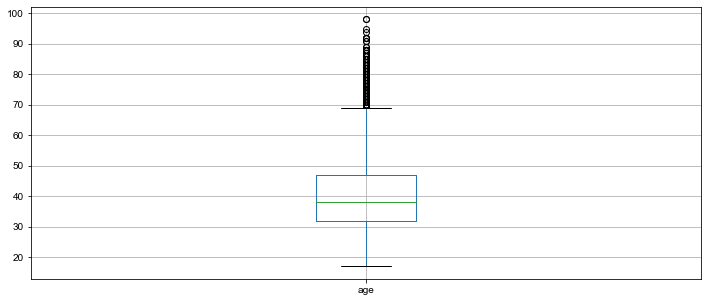

<Figure size 432x288 with 0 Axes>

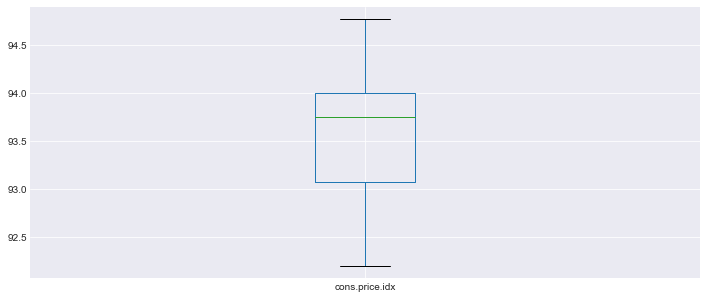

<Figure size 432x288 with 0 Axes>

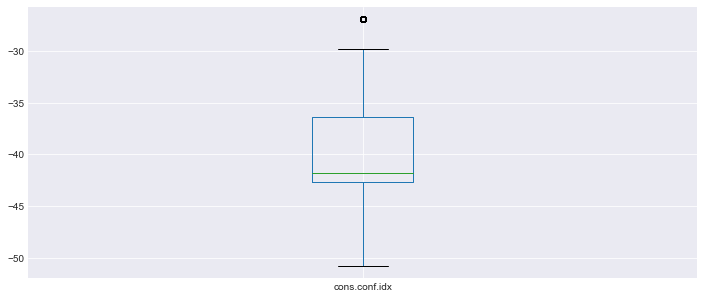

<Figure size 432x288 with 0 Axes>

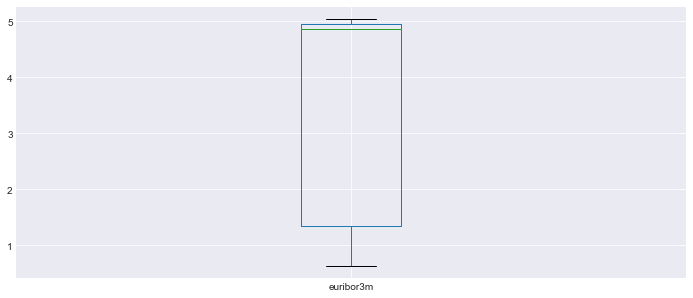

<Figure size 432x288 with 0 Axes>

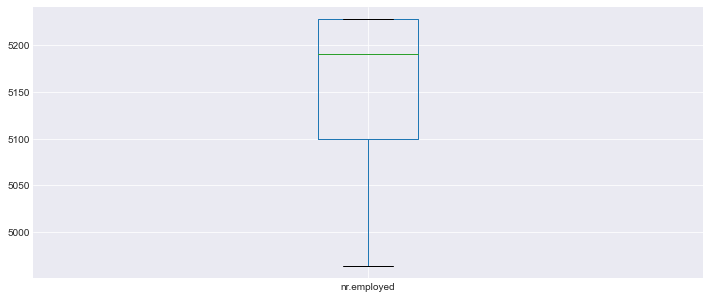

<Figure size 432x288 with 0 Axes>

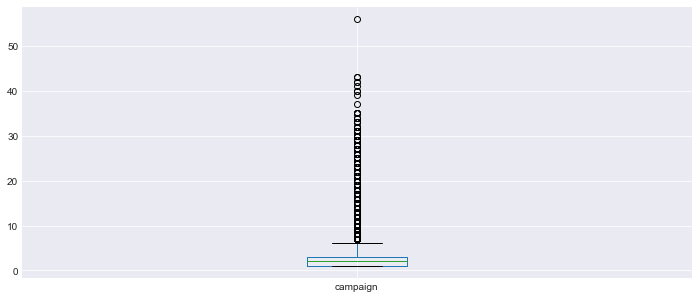

<Figure size 432x288 with 0 Axes>

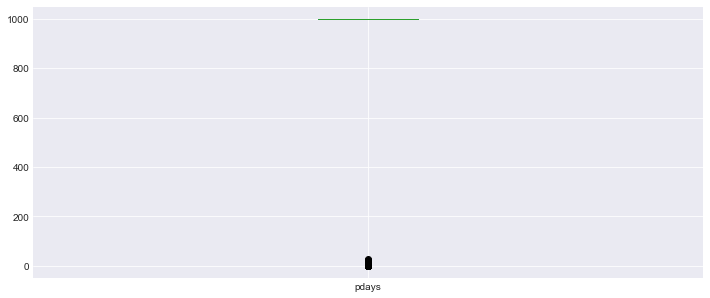

In [8]:
#visualizing the outliers using boxplot
for column in bank_data_num:
    plt.figure()
    plt.subplots(figsize=(12,5))
    plt.style.use('seaborn-darkgrid')
    bank_data_num.boxplot([column])

In [9]:
# There are several outliers in the age and campaign column. This can be handled by transforming them
# Transorming the outliers using log
bank_data['log_age'] = [np.log(x) for x in bank_data['age']]
bank_data['log_campaign'] = [np.log(x) for x in bank_data['campaign']]


In [10]:
bank_data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,log_age,log_campaign
0,56,housemaid,married,basic 4y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,4.025352,0.000000
1,57,services,married,high school,unknown,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,4.043051,0.000000
2,37,services,married,high school,no,yes,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,3.610918,0.000000
3,40,admin,married,basic 6y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,3.688879,0.000000
4,56,services,married,high school,no,no,yes,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,4.025352,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional course,no,yes,no,cellular,nov,fri,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,4.290459,0.000000
41184,46,blue-collar,married,professional course,no,no,no,cellular,nov,fri,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,3.828641,0.000000
41185,56,retired,married,university degree,no,yes,no,cellular,nov,fri,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,4.025352,0.693147
41186,44,technician,married,professional course,no,no,no,cellular,nov,fri,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,3.784190,0.000000


In [11]:
# To handle the missing values, we first turn the 'unknown' observations to NaNs
bank_data = bank_data.replace('unknown', np.nan)
bank_data.isnull().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
log_age              0
log_campaign         0
dtype: int64

In [12]:
#using partial deletion of the missing values on the job and marital attributes as those attributes do not show a strong relationship between the known/unknown status and target response.
bank_data = bank_data.dropna(subset=['job', 'marital'])


In [13]:
bank_data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,log_age,log_campaign
0,56,housemaid,married,basic 4y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,4.025352,0.000000
1,57,services,married,high school,NaN,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,4.043051,0.000000
2,37,services,married,high school,no,yes,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,3.610918,0.000000
3,40,admin,married,basic 6y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,3.688879,0.000000
4,56,services,married,high school,no,no,yes,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,4.025352,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional course,no,yes,no,cellular,nov,fri,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,4.290459,0.000000
41184,46,blue-collar,married,professional course,no,no,no,cellular,nov,fri,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,3.828641,0.000000
41185,56,retired,married,university degree,no,yes,no,cellular,nov,fri,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,4.025352,0.693147
41186,44,technician,married,professional course,no,no,no,cellular,nov,fri,...,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,3.784190,0.000000


In [14]:
bank_datta = bank_data.drop('duration', axis=1)

We drop the duration column because the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

In [15]:
#dealing with duplicates
bank_datta.duplicated().sum()

1778

In [16]:
bank_datta = bank_datta.drop_duplicates()

In [17]:
bank_datta.isnull().sum()

age                  0
job                  0
marital              0
education         1554
default           8108
housing            974
loan               974
contact              0
month                0
day_of_week          0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
log_age              0
log_campaign         0
dtype: int64

In [18]:
bank_dataa = bank_datta.fillna(bank_data.mode().iloc[0])

In [19]:
bank_dataa.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
log_age           0
log_campaign      0
dtype: int64

Text(0.5, 1.05, 'Pearson correlation of Features')

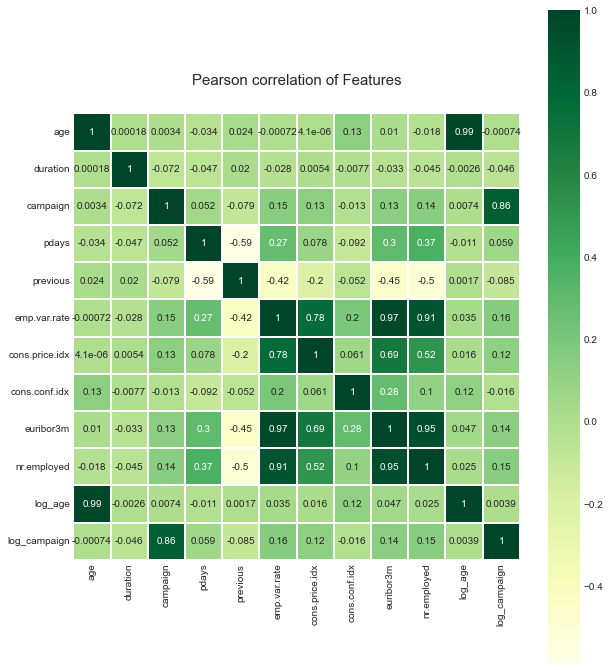

In [20]:
#checking correlatons between variables
corr = bank_data.corr()

f, ax = plt.subplots(figsize=(10,12))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

_ = sns.heatmap(corr, cmap="YlGn", square=True, ax=ax, annot=True, linewidth=0.1)

plt.title("Pearson correlation of Features", y=1.05, size=15)

In [21]:
#Seperating independent variables and target variables

X = bank_dataa.drop('y', axis=1)
print("Shape of X:", X.shape)
y = bank_dataa["y"]
print("Shape of y:", y.shape)

Shape of X: (39009, 21)
Shape of y: (39009,)


In [22]:
X.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'log_age', 'log_campaign'],
      dtype='object')

In [23]:
# performing an 80-20 Train-test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Encoding categorical and target variables

In [24]:
# Categorical mask
cat_feat_mask = X.dtypes==object

cat_cols = X.columns[cat_feat_mask].tolist()

cat_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [25]:
#encoding categrical variables using Ordinal Encoder

from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder(categories = [['basic 9y', 'university degree', 'illiterate', 'basic 4y', 'basic 6y', 'professional course', 'high school']])
X_train.education = ord_enc.fit_transform(X_train.loc[:, ["education"]])
X_test.education = ord_enc.transform(X_test.loc[:, ["education"]])
X_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,log_age,log_campaign
6704,40,admin,single,1.0,no,no,no,telephone,may,wed,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,3.688879,1.098612
33518,32,technician,single,1.0,no,yes,no,cellular,may,tue,...,999,1,failure,-1.8,92.893,-46.2,1.291,5099.1,3.465736,1.386294
17843,37,services,married,6.0,no,yes,no,cellular,jul,tue,...,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,3.610918,1.945910
13825,52,admin,married,6.0,no,yes,no,cellular,jul,fri,...,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,3.951244,0.000000
35666,58,management,married,1.0,no,no,no,cellular,may,mon,...,999,0,nonexistent,-1.8,92.893,-46.2,1.244,5099.1,4.060443,0.000000


In [26]:
#binary encoding
y_train.replace({"no":0, "yes":1}, inplace=True)
y_test.replace({"no":0, "yes":1}, inplace=True)

In [27]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y_train = y_train.to_frame()
y_test = y_test.to_frame()
y_train["y"]=le.fit_transform(y_train["y"])
y_test["y"] = le.transform(y_test["y"])

In [28]:
cols_to_encode_Xtrain = X_train.select_dtypes(include="object")
cols_to_encode_Xtest = X_test.select_dtypes(include="object")
#select the variables to encode first

for col in cols_to_encode_Xtrain:
  X_train = pd.concat([X_train, pd.get_dummies(X_train[col], prefix="%s"%col)], axis=1)
  X_train.drop([col], axis=1, inplace=True)

for col in cols_to_encode_Xtest:
  X_test = pd.concat([X_test, pd.get_dummies(X_test[col], prefix="%s"%col)], axis=1)
  X_test.drop([col], axis=1, inplace=True)

In [29]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


### Building the model

#### XGBOOST

In [30]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [31]:
#intantiating the model
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

alpha=[10, 50, 100, 500, 1000, 2000]

accuracy=[]
for i in alpha:
    xgb=XGBClassifier(n_estimators=i)
    xgb.fit(X_train, y_train)
    
    predict_y = xgb.predict(X_test)
    accuracy.append(roc_auc_score(y_test, predict_y))

In [32]:
print(accuracy)

[0.614782113612914, 0.6149904721334106, 0.6151588837450578, 0.6234658068291152, 0.6242204047508672, 0.6285503730520594]


#### XGBOOST With Cross Validation using Randomized Search CV

In [36]:
from sklearn.model_selection import RandomizedSearchCV

params={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
random_cv = RandomizedSearchCV(estimator = xgb, param_distributions=params, verbose=10, n_iter=10, cv=10, scoring='roc_auc', n_jobs=-1)
random_cv.fit(X_train, y_train)


Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           callbacks=None, colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=0, gpu_id=-1,
                                           grow_policy='depthwise',
                                           importance_type=None,
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_bin=256...
                                           monotone_constraints='()',
                                           n_estimators=2000, n_jobs=0,
                                           num_parallel_tree=1,
                                           predictor='auto', random_state=0,
                                           reg_alpha=0, reg_lambda=1, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.1, 0.3, 0.5, 1],
                                        'learning_rate': [0.01, 0.03, 0.05, 0.1,
                                                          0.15, 0.2],
                                        'max_depth': [3, 5, 10],
                                        'n_estimators': [100, 200, 500, 1000,
                                                         2000],
                                        'subsample': [0.1, 0.3, 0.5, 1]},
                   scoring='roc_auc', verbose=10)

In [38]:
pred = random_cv.predict(X_test)
pred

array([0, 0, 0, ..., 0, 0, 0])

In [41]:
print(roc_auc_score(y_test, pred))

0.6004083045962376


In [44]:
#getting the best hyper parameters
random_cv.best_params_

{'subsample': 0.5,
 'n_estimators': 100,
 'max_depth': 5,
 'learning_rate': 0.05,
 'colsample_bytree': 0.3}

In [45]:
#
random_cv.best_score_

0.8034895947839038

In [48]:
#Evaluating train and test accuracy
acc_train = random_cv.score(X_train, y_train)
acc_test = random_cv.score(X_test, y_test)
print(acc_train)
print(acc_test)

0.8234923048866664
0.7893932251669757


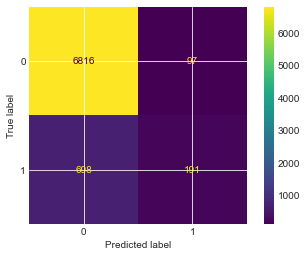

In [43]:
#Plotting confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(random_cv, X_test, y_test);

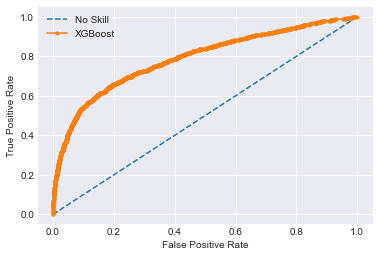

In [51]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = random_cv.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

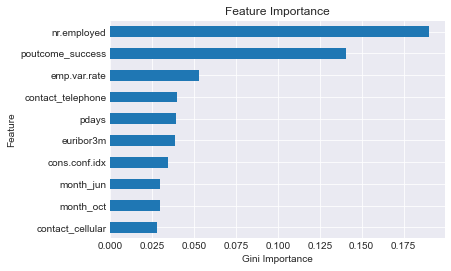

In [66]:
# Get feature importances from model
importances = random_cv.best_estimator_.feature_importances_
# Create a series with feature names and importances
feat_importance = pd.Series(importances, index=X_train.columns).sort_values()
feat_importance.tail(10).plot(kind = "barh")
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Feature Importance");